# Import data and important library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
df=pd.read_excel(r"C:\Users\Jastin\Desktop\datasaet\adult.xlsx")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Data preparatiom and Cleaning

In [7]:
df.duplicated().sum()

np.int64(24)

In [8]:
df.drop_duplicates(inplace=True)


In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [11]:
df.columns=df.columns.str.replace('.', '_')
df.columns=df.columns.str.lower()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [12]:
df.replace('?','N/A', inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,N/A,77053,HS-grad,9,Widowed,N/A,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,N/A,186061,Some-college,10,Widowed,N/A,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [13]:
df['age'].max()

90

In [14]:
df['age'].min()

17

In [15]:
bins=[14,18,35,60,90]
labels=['Youth', 'Middle_age', 'Adults', 'Senior']
df['age_group']=pd.cut(df['age'], bins=bins, labels=labels)

# Descriptive Analytics

### Age distribution of individuals across different workclasses

<Axes: xlabel='age', ylabel='Count'>

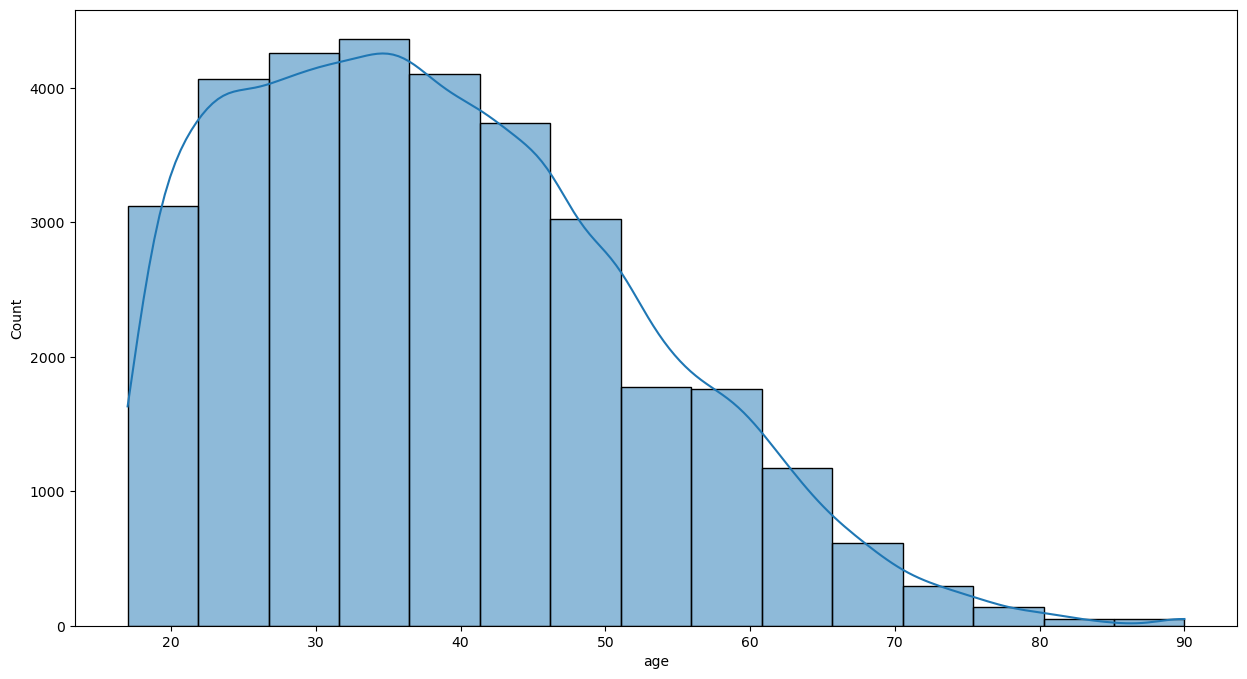

In [16]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='age',bins=15, kde=True)

### Which education levels are most common in the dataset

In [17]:
df.groupby('education')['education_num'].count().sort_values(ascending=False)

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education_num, dtype: int64

### How does education level vary by sex

In [18]:
df.groupby(['education','sex'])['education_num'].count()

education     sex   
10th          Female     295
              Male       638
11th          Female     432
              Male       743
12th          Female     144
              Male       289
1st-4th       Female      44
              Male       122
5th-6th       Female      84
              Male       248
7th-8th       Female     160
              Male       485
9th           Female     144
              Male       370
Assoc-acdm    Female     421
              Male       646
Assoc-voc     Female     500
              Male       882
Bachelors     Female    1618
              Male      3735
Doctorate     Female      86
              Male       327
HS-grad       Female    3388
              Male      7106
Masters       Female     536
              Male      1186
Preschool     Female      16
              Male        34
Prof-school   Female      92
              Male       484
Some-college  Female    2802
              Male      4480
Name: education_num, dtype: int64

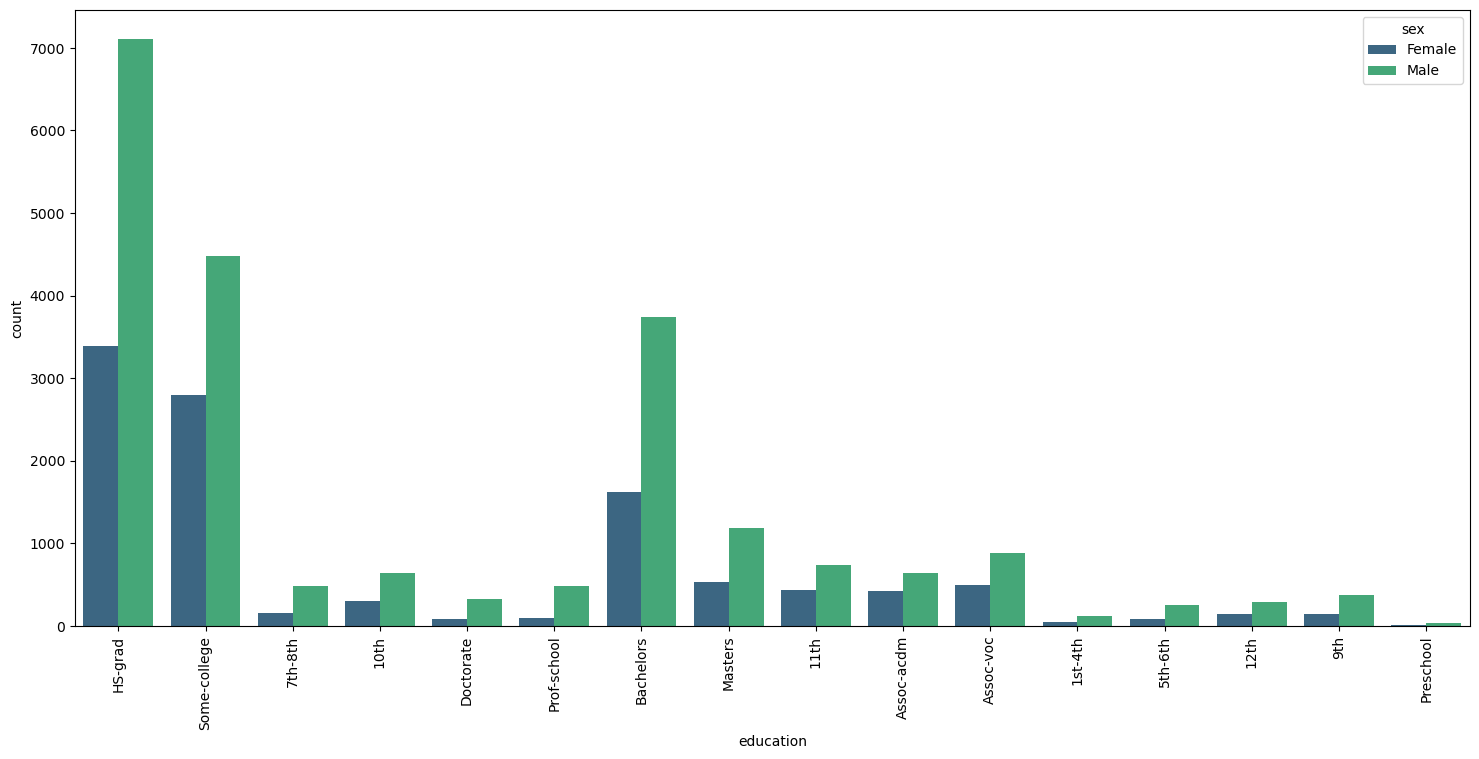

In [19]:
plt.figure(figsize=(18,8))
ax=sns.countplot(data=df, x='education', hue='sex',palette='viridis')
ax.tick_params(axis='x', labelrotation=90)

In [20]:
df.groupby(['workclass', 'occupation'])['occupation'].count()

workclass         occupation       
Federal-gov       Adm-clerical          317
                  Armed-Forces            9
                  Craft-repair           64
                  Exec-managerial       180
                  Farming-fishing         8
                  Handlers-cleaners      23
                  Machine-op-inspct      14
                  Other-service          35
                  Prof-specialty        175
                  Protective-serv        28
                  Sales                  14
                  Tech-support           68
                  Transport-moving       25
Local-gov         Adm-clerical          283
                  Craft-repair          146
                  Exec-managerial       214
                  Farming-fishing        29
                  Handlers-cleaners      47
                  Machine-op-inspct      12
                  Other-service         193
                  Prof-specialty        705
                  Protective-serv       

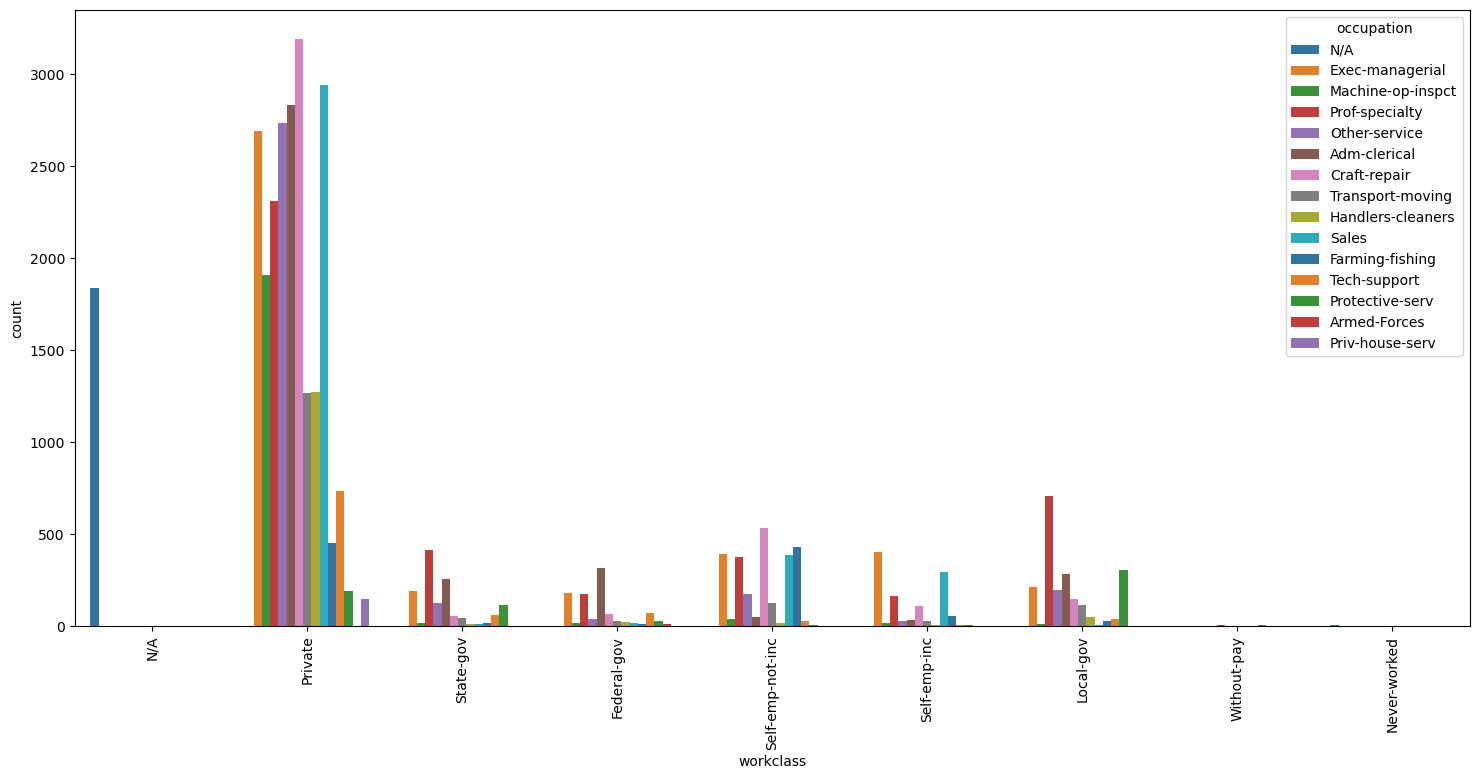

In [21]:
plt.figure(figsize=(18,8))
ax=sns.countplot(data=df, x='workclass', hue='occupation', palette='tab10')
ax.tick_params(axis='x', labelrotation=90)

### Which marital statuses are most prevalent across age groups

In [22]:
df.groupby(['age_group','marital_status'], observed=True)["marital_status"].count()

age_group   marital_status       
Youth       Divorced                    1
            Married-civ-spouse          9
            Married-spouse-absent       1
            Never-married             932
            Separated                   1
            Widowed                     1
Middle_age  Divorced                 1115
            Married-AF-spouse          18
            Married-civ-spouse       4425
            Married-spouse-absent     162
            Never-married            7800
            Separated                 407
            Widowed                    38
Adults      Divorced                 3070
            Married-AF-spouse           4
            Married-civ-spouse       9153
            Married-spouse-absent     230
            Never-married            1792
            Separated                 579
            Widowed                   468
Senior      Divorced                  255
            Married-AF-spouse           1
            Married-civ-spouse       1383


# Demographic & Social Insights

### How does occupation differ between men and women

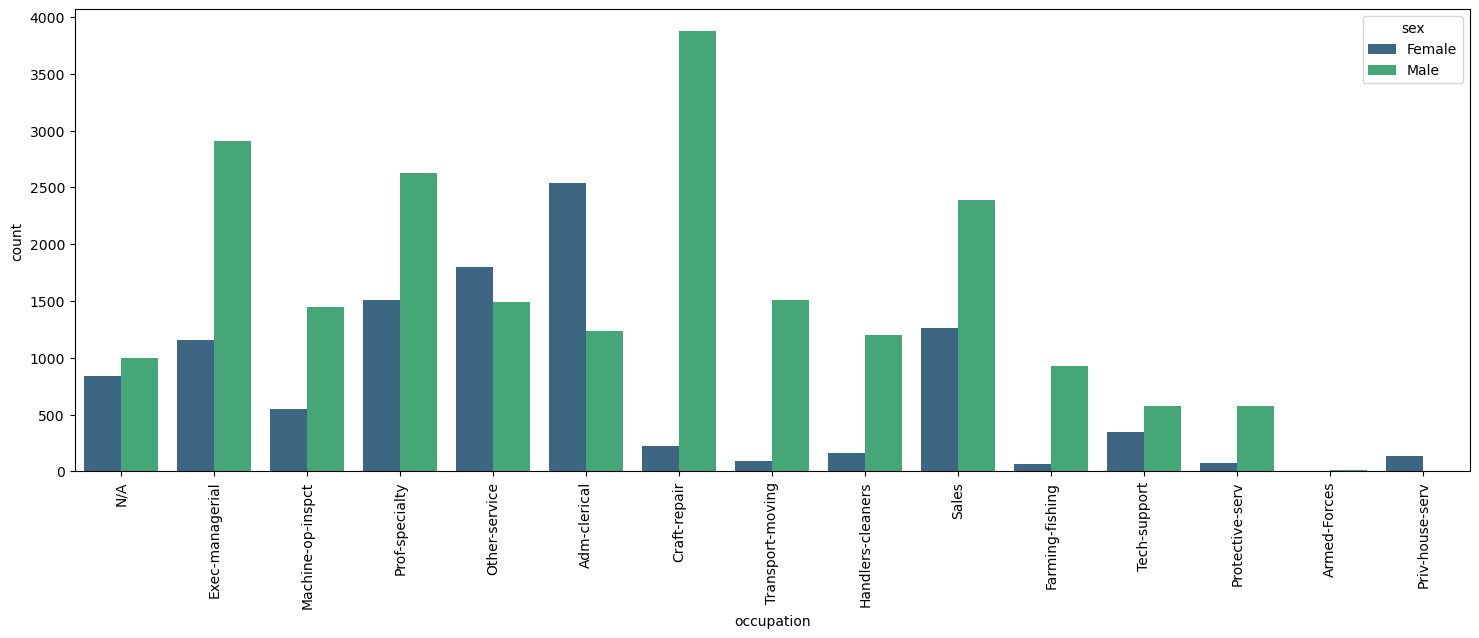

In [23]:
plt.figure(figsize=(18,6))
ax=sns.countplot(data=df, x='occupation', hue='sex', palette='viridis' )
ax.tick_params(axis="x", labelrotation=90)

### Relationship between education level and marital status

In [24]:
df.groupby(['marital_status','education'], observed=True)['marital_status'].count()

marital_status         education   
Divorced               10th             120
                       11th             130
                       12th              39
                       1st-4th           10
                       5th-6th           20
                       7th-8th           73
                       9th               64
                       Assoc-acdm       203
                       Assoc-voc        234
                       Bachelors        546
                       Doctorate         33
                       HS-grad         1612
                       Masters          233
                       Preschool          1
                       Prof-school       55
                       Some-college    1068
Married-AF-spouse      Assoc-acdm         2
                       Assoc-voc          1
                       Bachelors          4
                       HS-grad           13
                       Some-college       3
Married-civ-spouse     10th             

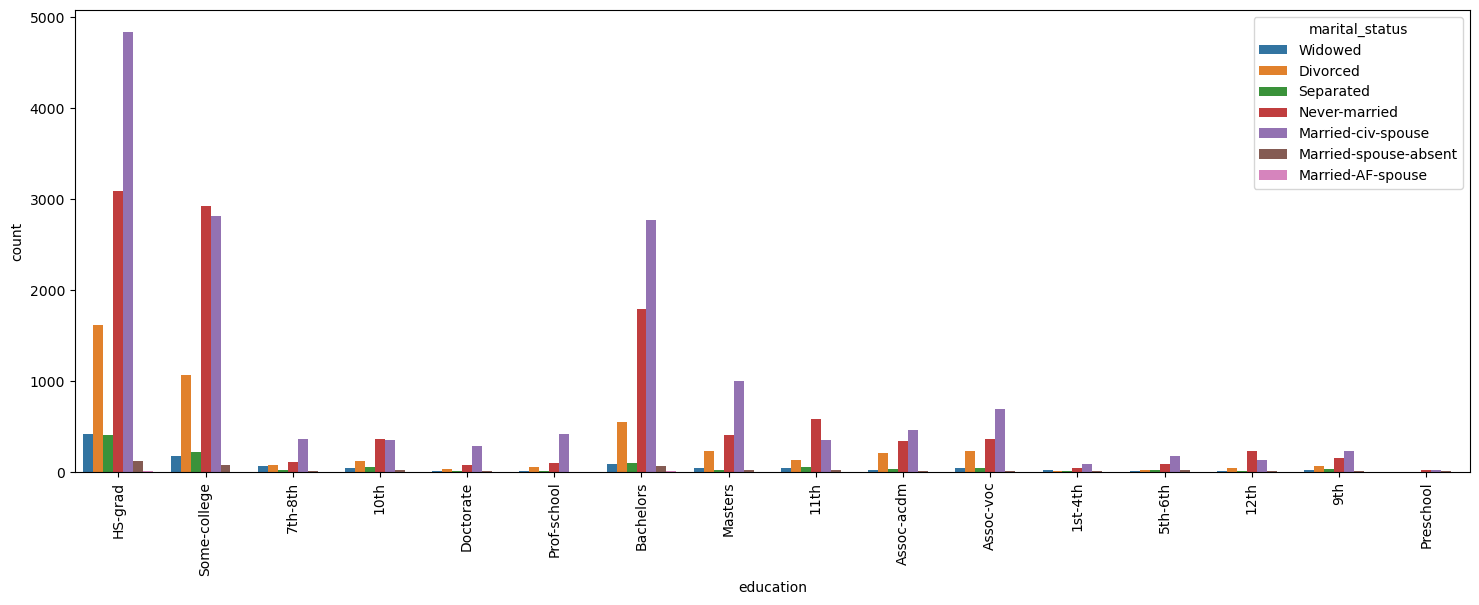

In [25]:
plt.figure(figsize=(18,6))
ax=sns.countplot(data=df, x='education', hue='marital_status', palette='tab10' )
ax.tick_params(axis="x", labelrotation=90)

### Relationship roles (Husband, Wife, Own-child, etc.) distributed by age group

In [26]:
df.groupby(['age_group','relationship'], observed=True)['relationship'].count()

age_group   relationship  
Youth       Husband              3
            Not-in-family       53
            Other-relative      51
            Own-child          824
            Unmarried           11
            Wife                 3
Middle_age  Husband           3682
            Not-in-family     4105
            Other-relative     603
            Own-child         3714
            Unmarried         1260
            Wife               601
Adults      Husband           8198
            Not-in-family     3441
            Other-relative     265
            Own-child          513
            Unmarried         1991
            Wife               888
Senior      Husband           1304
            Not-in-family      693
            Other-relative      62
            Own-child           13
            Unmarried          183
            Wife                76
Name: relationship, dtype: int64

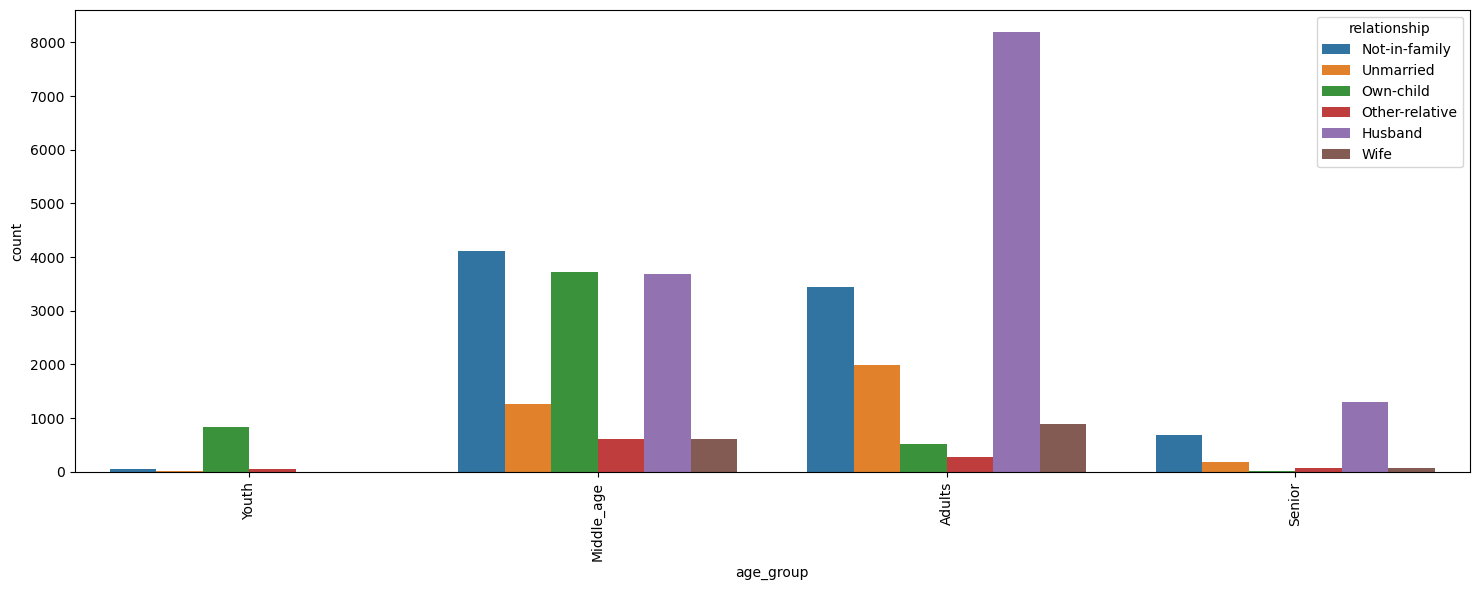

In [27]:
plt.figure(figsize=(18,6))
ax=sns.countplot(data=df, x='age_group', hue='relationship', palette='tab10' )
ax.tick_params(axis="x", labelrotation=90)

In [28]:
df.groupby(['workclass', 'race'])['workclass'].count()

workclass         race              
Federal-gov       Amer-Indian-Eskimo       19
                  Asian-Pac-Islander       44
                  Black                   169
                  Other                     7
                  White                   721
Local-gov         Amer-Indian-Eskimo       36
                  Asian-Pac-Islander       39
                  Black                   288
                  Other                    10
                  White                  1720
N/A               Amer-Indian-Eskimo       25
                  Asian-Pac-Islander       65
                  Black                   213
                  Other                    23
                  White                  1510
Never-worked      Black                     2
                  White                     5
Private           Amer-Indian-Eskimo      190
                  Asian-Pac-Islander      712
                  Black                  2174
                  Other                   2

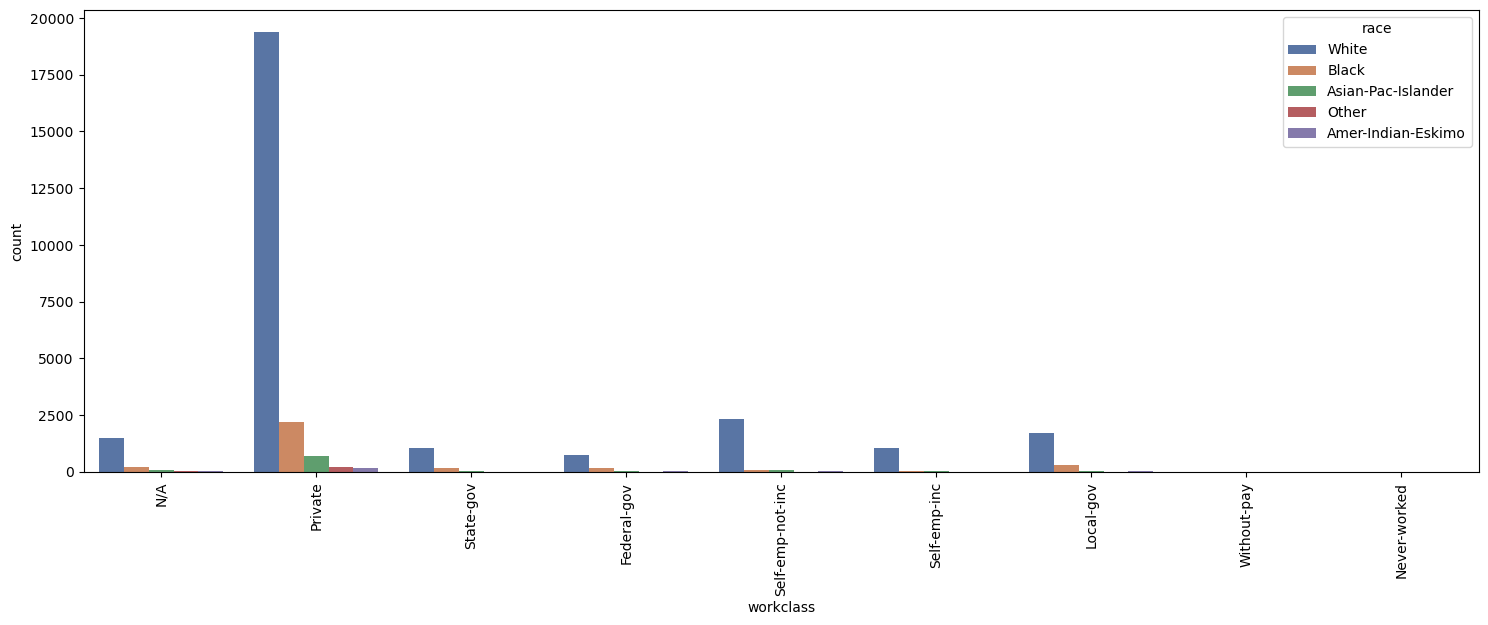

In [29]:
plt.figure(figsize=(18,6))
ax=sns.countplot(data=df, x='workclass', hue='race', palette='deep' )
ax.tick_params(axis="x", labelrotation=90)

### Education attainment among different racial groups

In [30]:
df.groupby(['education', 'race'])['education'].count()

education     race              
10th          Amer-Indian-Eskimo      16
              Asian-Pac-Islander      13
              Black                  133
              Other                    9
              White                  762
11th          Amer-Indian-Eskimo      14
              Asian-Pac-Islander      21
              Black                  153
              Other                   10
              White                  977
12th          Amer-Indian-Eskimo       5
              Asian-Pac-Islander       9
              Black                   70
              Other                   14
              White                  335
1st-4th       Amer-Indian-Eskimo       4
              Asian-Pac-Islander       5
              Black                   16
              Other                    9
              White                  132
5th-6th       Amer-Indian-Eskimo       2
              Asian-Pac-Islander      18
              Black                   21
              Other     

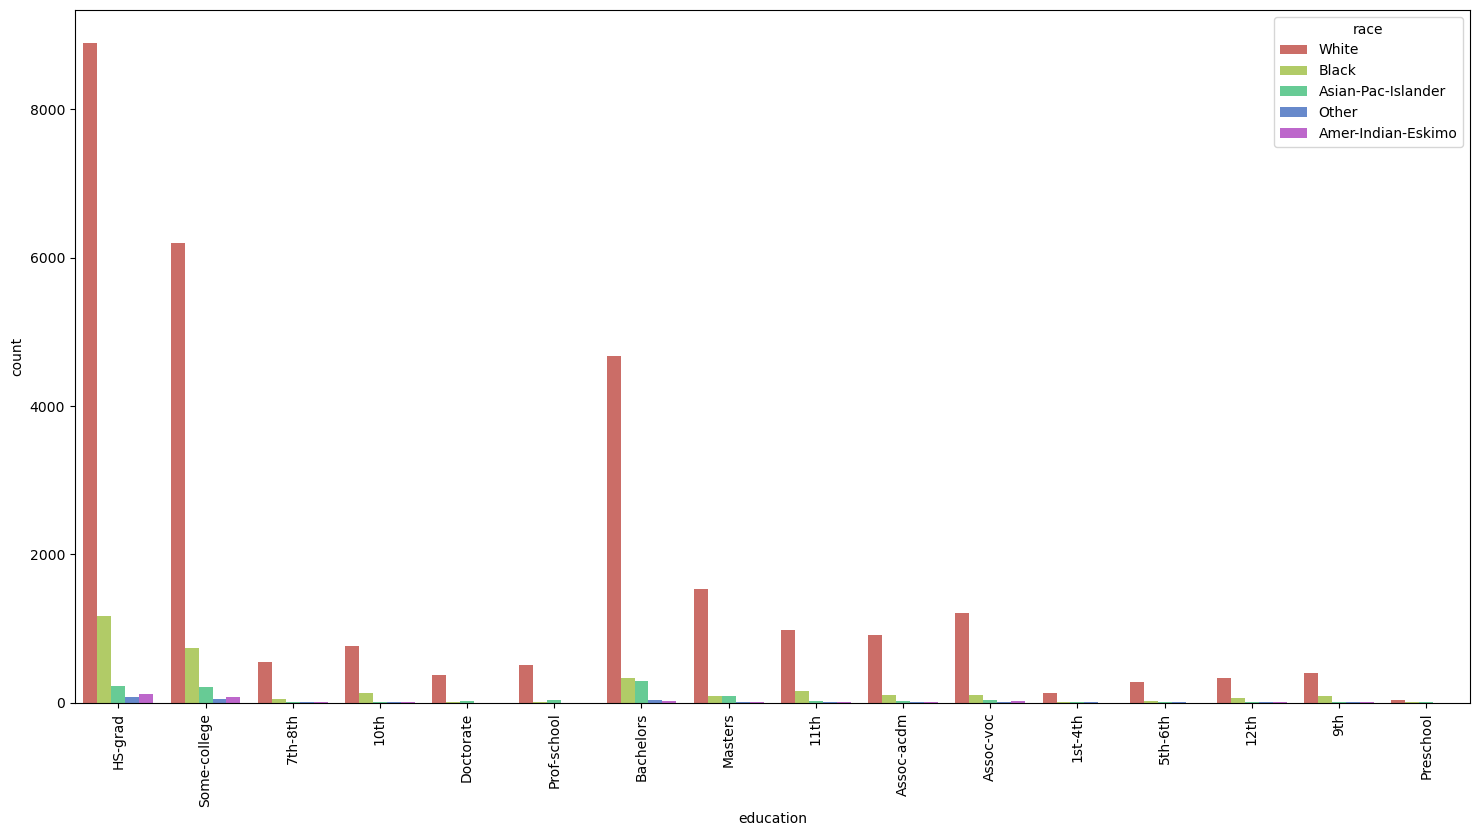

In [31]:
plt.figure(figsize=(18,9))
ax=sns.countplot(data=df, x='education', hue='race', palette='hls' )
ax.tick_params(axis="x", labelrotation=90)

# Career & Employment Patterns

### Poportion of people who earn more than $50K?

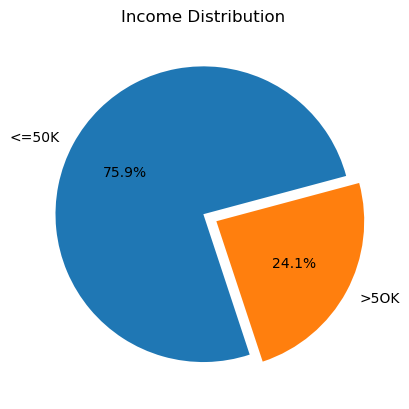

In [32]:
salary=df['income'].value_counts()
explode=[0,0.1]
plt.pie(salary, labels=['<=50K','>5OK'], explode=explode, autopct='%1.1f%%', startangle= 15, radius= 1)
plt.title('Income Distribution')
plt.show()

### the average age of people who earn more than $50K

In [33]:
df2=df[df['income'].str.contains('>50')]
df2['age'].mean()

np.float64(44.25092486286516)

### correlation between age and education level

In [34]:
df[['age','education_num']].corr()

,age,education_num
age,1.000000,0.036224
education_num,0.036224,1.000000


<Axes: >

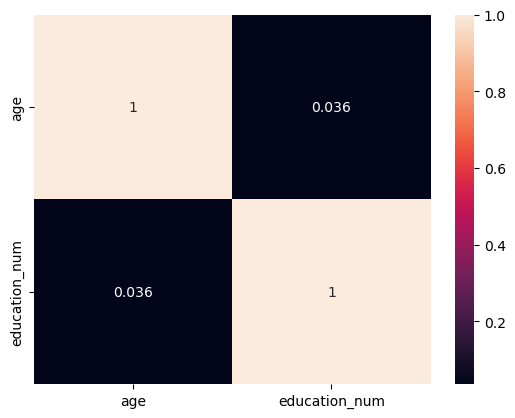

In [35]:
sns.heatmap(df[['age','education_num']].corr(), annot=True)

### proportion of men and women who earn more than $50K

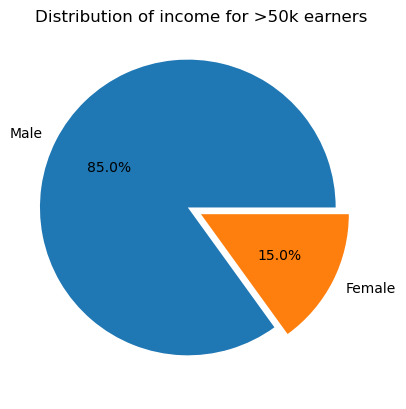

In [36]:
ovr=df2['sex'].value_counts()
explode=[0.1,0]
plt.pie(ovr,autopct='%1.1f%%', explode=explode, labels=['Male', 'Female'])
plt.title('Distribution of income for >50k earners')
plt.show()

### median hours worked per week for people who earn more than $50K

In [37]:
df2['hours_per_week'].median()

40.0

###  most common occupations for individuals with higher education levels (Bachelors and above)

In [38]:
df3=df[df['education'].isin(['Bachelors', 'Masters','Prof-school','Doctorate'])]


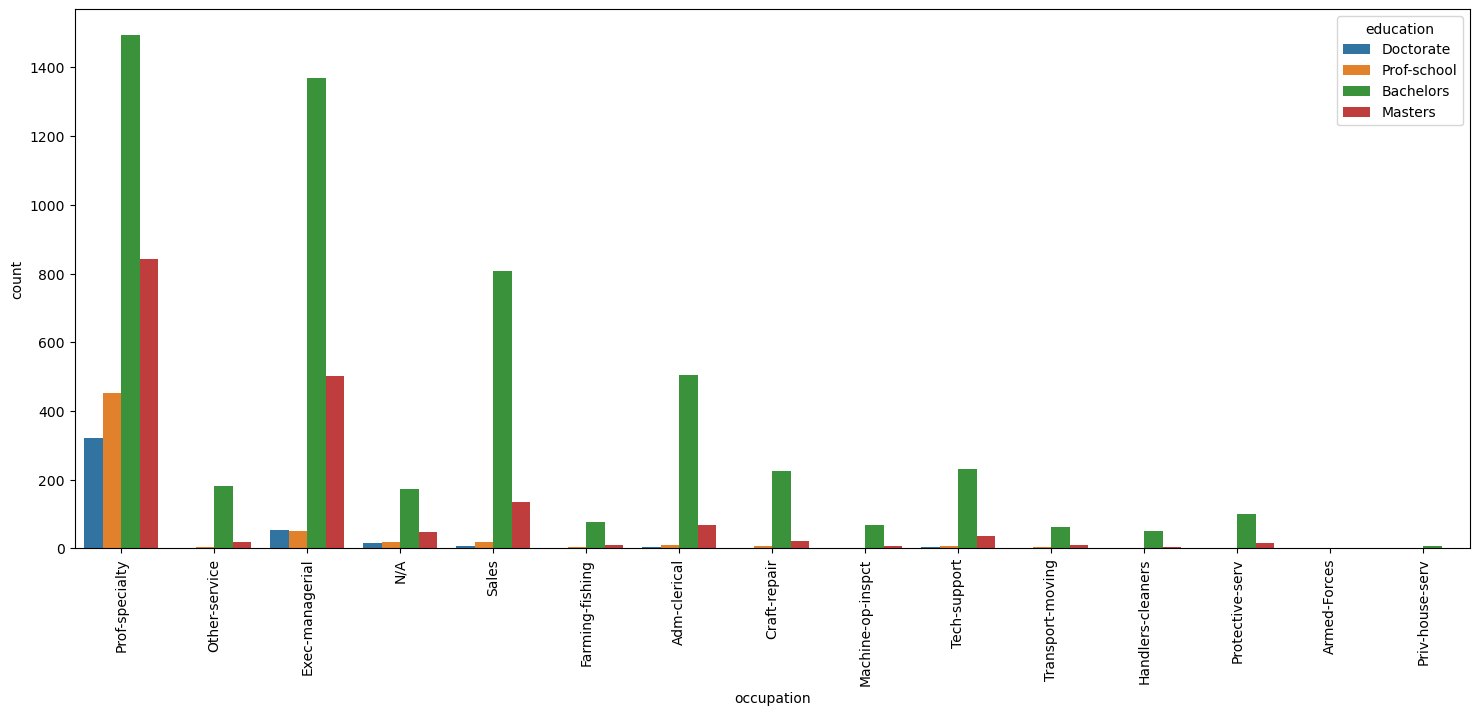

In [39]:
plt.figure(figsize=(18,7))
ax=sns.countplot(data=df3, x='occupation', hue='education', palette='tab10')
ax.tick_params(axis='x', labelrotation=90)

### individuals with advanced degrees are moere like to work in government vs private sectors

In [40]:
df4=df3[df3['workclass'].isin(['Private', 'Federal-gov','State-gov','Local-gov'])]

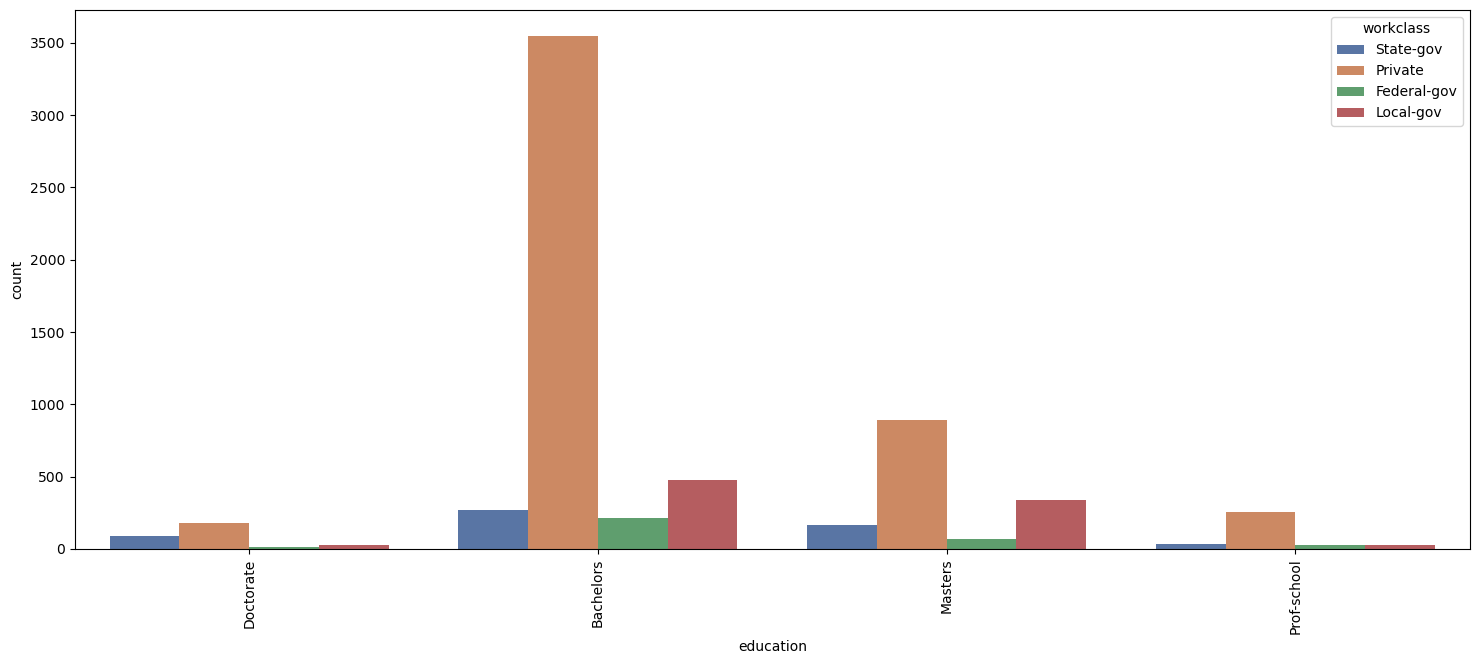

In [41]:
plt.figure(figsize=(18,7))
ax=sns.countplot(data=df4, x='education', hue='workclass', palette='deep')
ax.tick_params(axis='x', labelrotation=90)

### Age range that dominates executive and managerial roles

In [42]:
df4=df[df['occupation'].str.contains('Exec-managerial')]

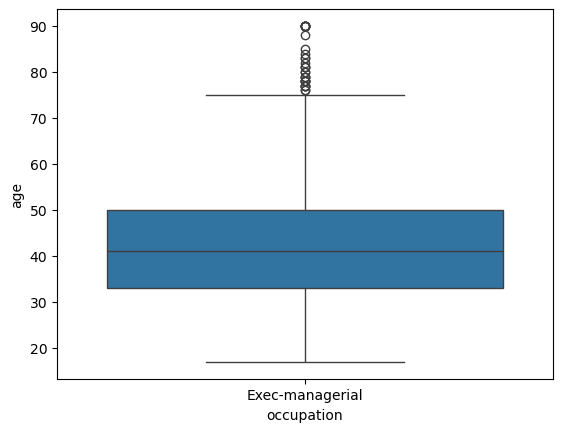

In [43]:
sns.boxplot(data=df4, x='occupation', y='age')
plt.show()


# Gender Equality Analysis

### Gender imbalances across various occupation

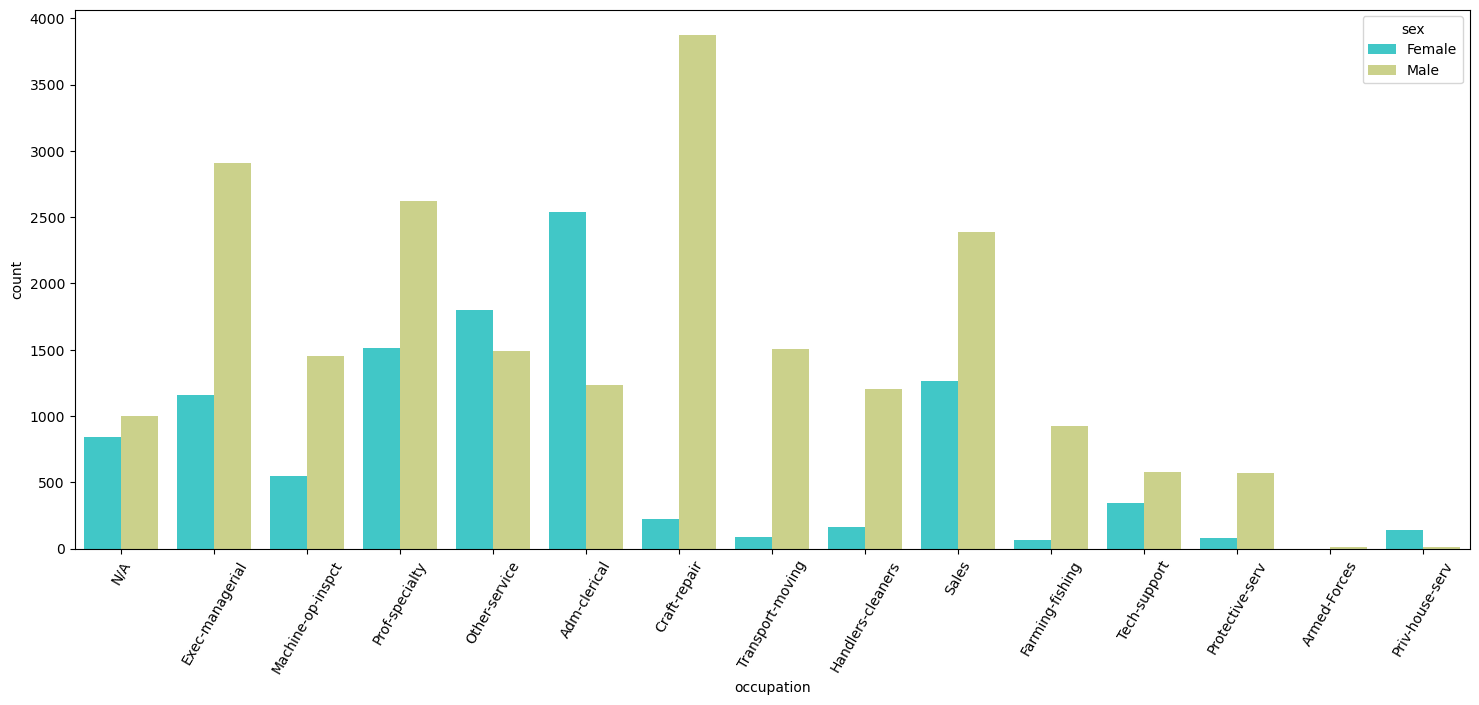

In [44]:
plt.figure(figsize=(18,7))
g=sns.countplot(data=df, x='occupation', hue='sex', palette='rainbow')
g.tick_params(axis='x', labelrotation=60)

### education levels between males and females across workclasses

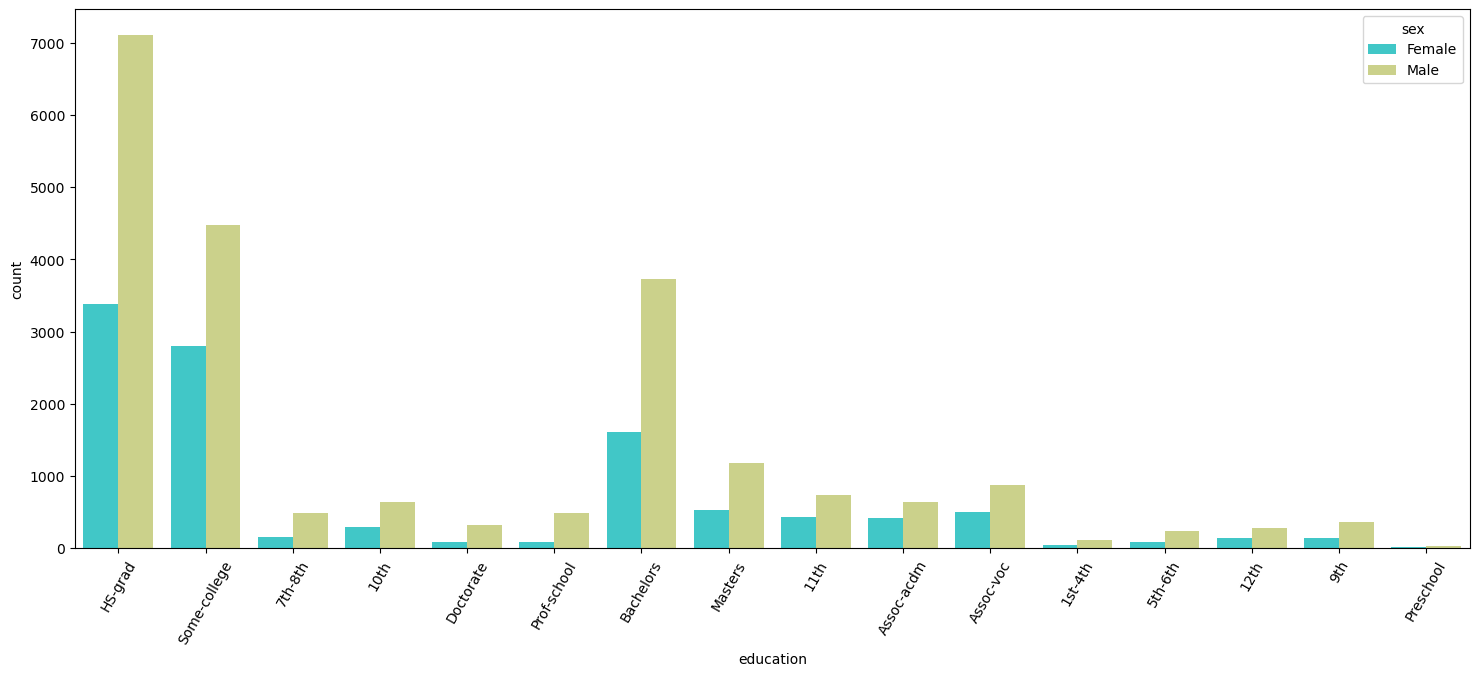

In [45]:
plt.figure(figsize=(18,7))
g=sns.countplot(data=df, x='education', hue='sex', palette='rainbow')
g.tick_params(axis='x', labelrotation=60)

### marital status differ between men and women at similar age ranges

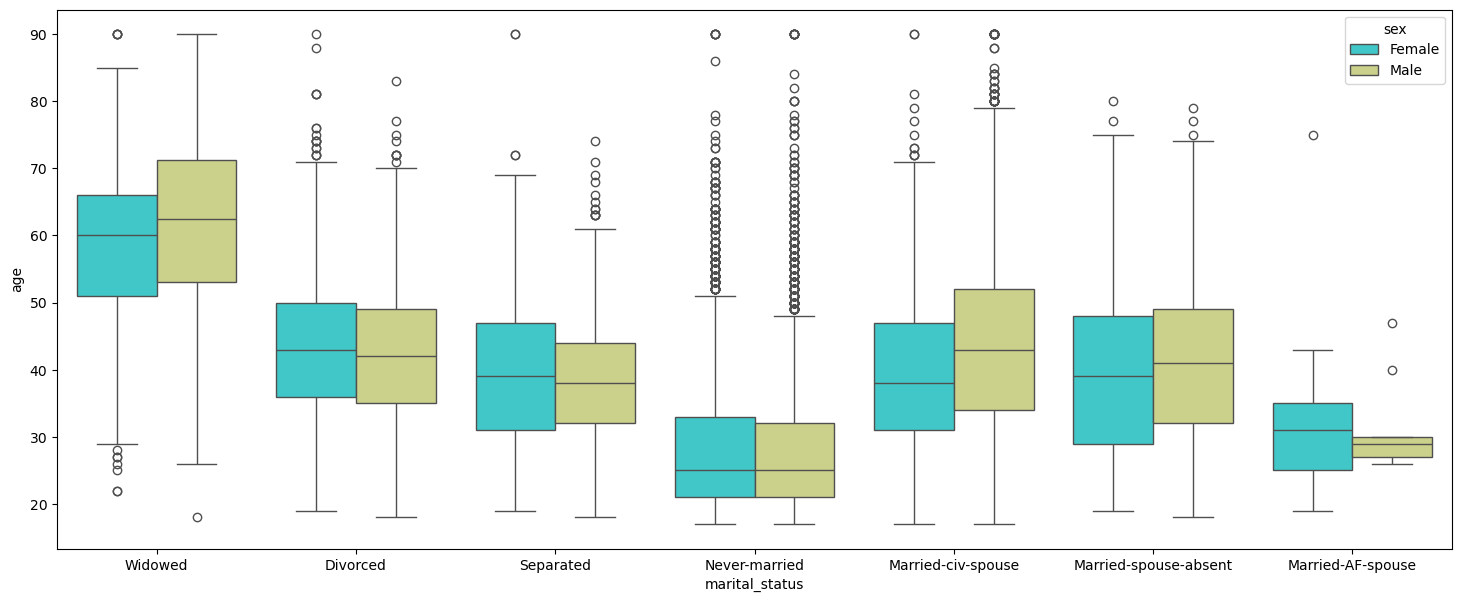

In [46]:
plt.figure(figsize=(18,7))
sns.boxplot(data=df, x='marital_status', y='age', hue='sex', palette='rainbow')
plt.show()